In [1]:
import random
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

In [2]:
'''Create your own database
var=variance
size=numer of rows
corr=correlation (Pos,Neg,False)
Step=add correlation to database'''

def create_dataset(size,var,step=2,corr=False):
    val=1
    y=[]
    current_size=0
    while(current_size<size):
        y.append(val+random.randint(-var,var))
        current_size+=1
        if corr=='pos':
            val+=step
        elif corr=='neg':
            val-=step
    x=[i for i in range(1,len(y)+1)]
    return np.array(x),np.array(y)

In [3]:
#Get slope and intercept for best fit line
def fit_line_para(x,y):
    m=( (mean(x)*mean(y))-(mean(x*y)) )/( (mean(x)**2)-mean(x**2) )
    b=mean(y)-m*mean(x)
    return m,b

In [4]:
def sqr_error(y_orig,y_pred):
    return sum((y_pred-y_orig)**2)

#MSE
def mean_sqr_error(y_orig,y_pred):
    return sqr_error(y_orig,y_pred)/len(y_orig)

#RMSE
def root_mean_sqr_error(y_orig,y_pred):
    return (mean_sqr_error(y_orig,y_pred))**0.5

In [314]:
#Coefficient of Determination
#r^2=1-(square_error(y)/square_error(y_mean))
def coeff_of_determination(y_orig,y_pred):
    y_mean=np.array([mean(y_orig) for i in y_orig])
    y_line_error=sqr_error(y_orig,y_pred)
    y_mean_error=sqr_error(y_orig,y_mean)
    return 1-( y_line_error/y_mean_error )


In [413]:
x,y=create_dataset(150,15,corr='pos') #creating database

In [414]:
x_train,y_train,x_test,y_test=x[:int(len(x)*0.7)],y[:int(len(x)*0.7)],x[int(len(x)*0.7):len(x)],y[int(len(x)*0.7):len(x)]

In [415]:
m,b=fit_line_para(x_train,y_train)
def predict(x):
    global m,b
    return [m*i+b for i in x]

In [416]:
y_pred=predict(x_test)

In [417]:
accuracy=coeff_of_determination(y_test,np.array(y_pred))

In [418]:
print("MSE: ",mean_sqr_error(y_test,y_pred),"\nRMSE: ",root_mean_sqr_error(y_test,y_pred))

MSE:  82.89299185340242 
RMSE:  9.104558850015877


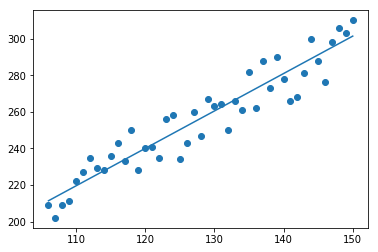

In [419]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)

In [420]:
#Best fit line from the sklearn library
from sklearn.linear_model import LinearRegression

In [421]:
model=LinearRegression()
model.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [422]:
print("Sklearn Model's accuracy: ",model.score(x_test.reshape(-1,1),y_test.reshape(-1,1)),"\nManually Calculate accuracy: ",accuracy)

Sklearn Model's accuracy:  0.8829527223727396 
Manually Calculate accuracy:  0.8922503644414018


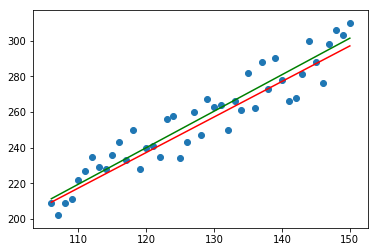

In [423]:
plt.plot(x_test,model.predict(x_test.reshape(-1,1)),c='r') #Sklearn Model's best fit line (RED)
plt.plot(x_test,y_pred,c='g') #Manually calculated best fit line (GREEN)
plt.scatter(x_test,y_test)